In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dados_tratados.csv")

# 🛠️ Preparação dos Dados

In [3]:
print("Colunas do dataset:")
print(df.columns)

Colunas do dataset:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [4]:
colunas_irrelevantes = ["customerID"]

In [5]:
df = df.drop(columns=colunas_irrelevantes, errors='ignore')
print("\nColunas removidas:")
print(colunas_irrelevantes)


Colunas removidas:
['customerID']


In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)
print("Dataset codificado:")
print(df_encoded.head())

Dataset codificado:
   Churn_Yes  \
0      False   
1      False   
2       True   
3       True   
4       True   

   customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}  \
0                                              False                                                      
1                                              False                                                      
2                                              False                                                      
3                                              False                                                      
4                                              False                                                      

   customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 12}  \
0                                              False                                                      
1                         

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
encoder = OneHotEncoder(drop="first", sparse_output=False)

In [9]:
encoded = encoder.fit_transform(df.select_dtypes(include=["object"]))

In [10]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(df.select_dtypes(include=["object"]).columns))

In [11]:
df_final = pd.concat([df.drop(columns=df.select_dtypes(include=["object"]).columns), encoded_df], axis=1)

print(df_final.head())

   Churn_Yes  Churn_nan  \
0        0.0        0.0   
1        0.0        0.0   
2        1.0        0.0   
3        1.0        0.0   
4        1.0        0.0   

   customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}  \
0                                                0.0                                                      
1                                                0.0                                                      
2                                                0.0                                                      
3                                                0.0                                                      
4                                                0.0                                                      

   customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 12}  \
0                                                0.0                                   

In [12]:
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [13]:
print(df["Churn"].value_counts(normalize=True))

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
print(df_final.columns.tolist())

['Churn_Yes', 'Churn_nan', "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 12}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 13}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 14}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 15}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 16}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 17}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 18}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 19}", "customer_{'gender': 'Female', 'Senio

In [16]:
y = df_final["Churn_Yes"]

In [17]:
X = df_final.drop(["Churn_Yes", "Churn_nan"], axis=1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
X_train_norm = scaler_minmax.fit_transform(X_train)
X_test_norm = scaler_minmax.transform(X_test)

# 🎯 Correlação e Seleção de Variáveis

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
num_df = df_final.select_dtypes(include=["int64", "float64"])

In [24]:
num_df["churn"] = y

In [25]:
num_df = df_final.select_dtypes(include=["number"]).copy()

In [26]:
print("Colunas numéricas:", num_df.shape[1])
print(num_df.columns.tolist())

Colunas numéricas: 7952
['Churn_Yes', 'Churn_nan', "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 12}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 13}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 14}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 15}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 16}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 17}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 18}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 19}", "customer_{'g

In [27]:
num_df["churn"] = y.astype(int)

In [28]:
corr_dict = {}

In [29]:
for col in num_df.columns:
    if col != "churn":
        corr_dict[col] = num_df["churn"].corr(num_df[col])

In [30]:
corr_target = pd.Series(corr_dict).sort_values(ascending=False)

In [31]:
print("Top 15 variáveis mais correlacionadas:")
print(corr_target.head(15))

print("\nBottom 15 variáveis mais correlacionadas (negativamente):")
print(corr_target.tail(15))

Top 15 variáveis mais correlacionadas:
Churn_Yes                                                                                                                                                                                    1.000000
internet_{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}       0.181059
internet_{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}     0.135887
internet_{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}      0.130944
customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}                                                                      

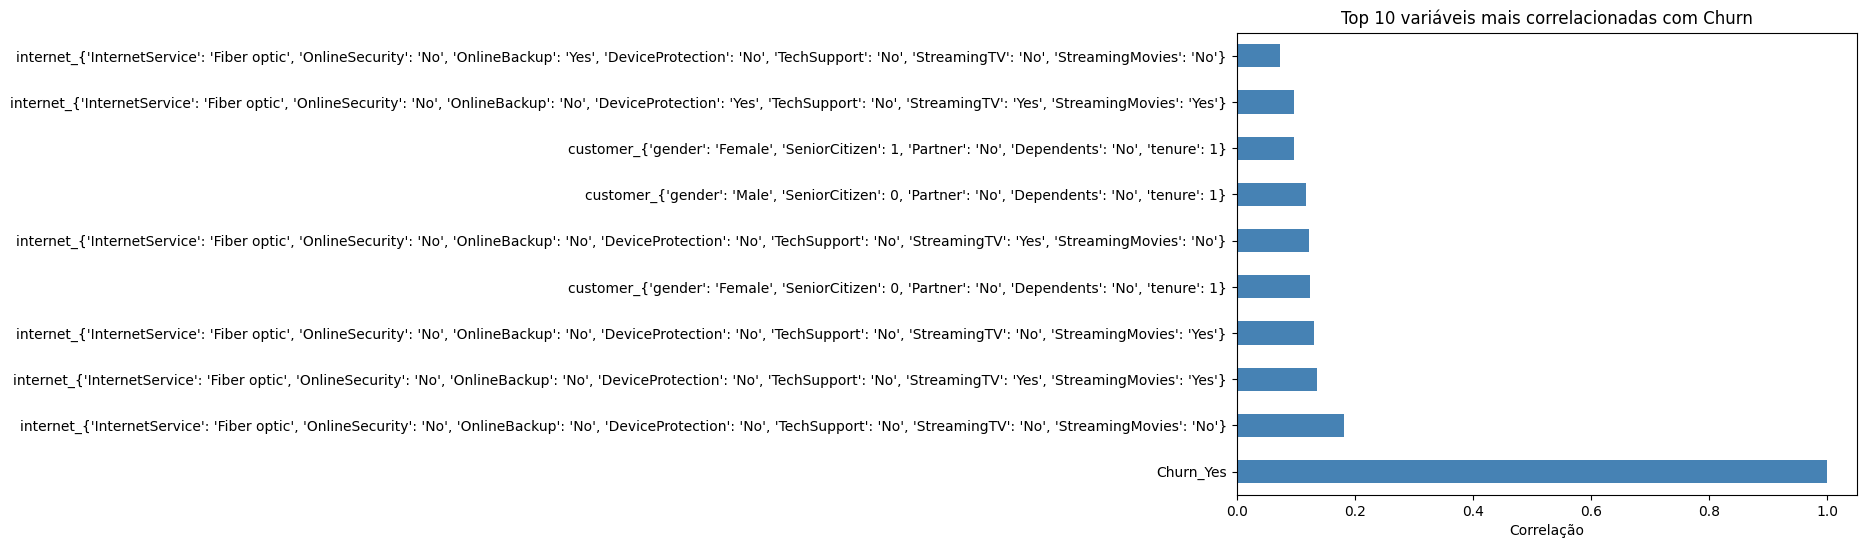

In [32]:
plt.figure(figsize=(8,6))
corr_target.head(10).plot(kind="barh", color="steelblue")
plt.title("Top 10 variáveis mais correlacionadas com Churn")
plt.xlabel("Correlação")
plt.show()

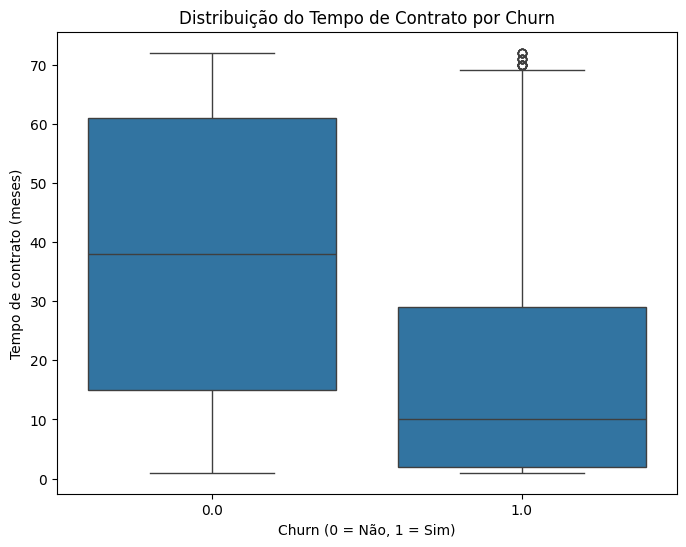

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_Yes', y='tenure', data=num_df)
plt.title("Distribuição do Tempo de Contrato por Churn")
plt.xlabel("Churn (0 = Não, 1 = Sim)")
plt.ylabel("Tempo de contrato (meses)")
plt.show()

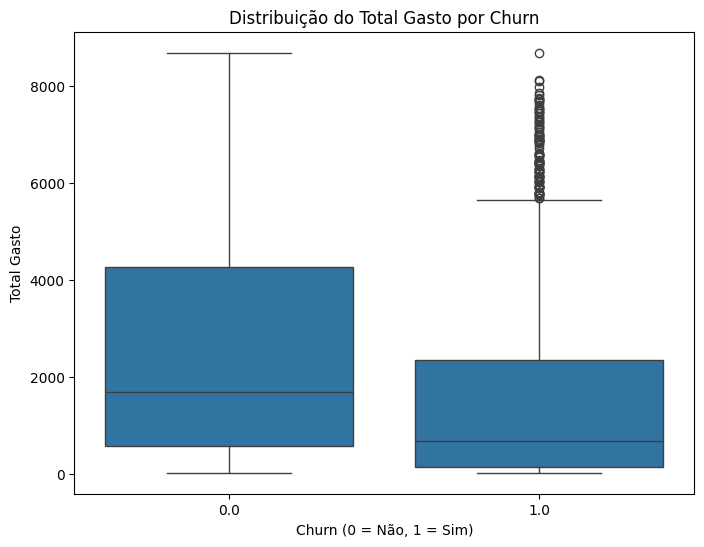

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_Yes', y='TotalCharges', data=num_df)
plt.title("Distribuição do Total Gasto por Churn")
plt.xlabel("Churn (0 = Não, 1 = Sim)")
plt.ylabel("Total Gasto")
plt.show()

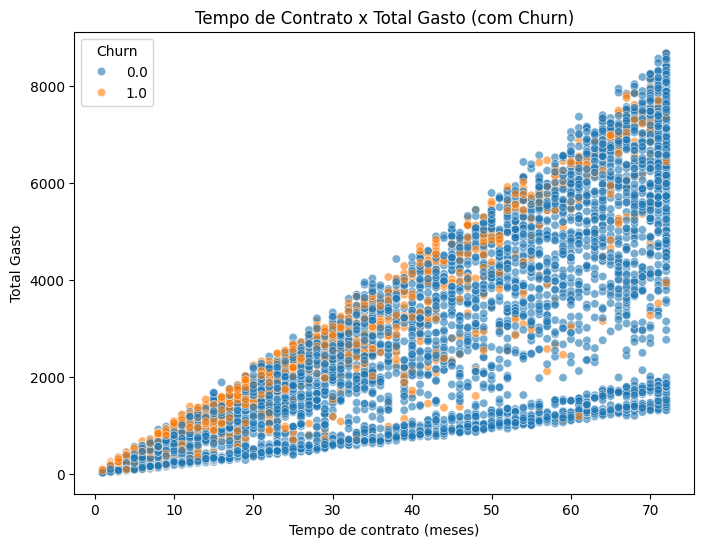

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn_Yes', data=num_df, alpha=0.6)
plt.title("Tempo de Contrato x Total Gasto (com Churn)")
plt.xlabel("Tempo de contrato (meses)")
plt.ylabel("Total Gasto")
plt.legend(title="Churn")
plt.show()

# 🤖 Modelagem Preditiva

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_final.drop(["Churn_Yes", "Churn_nan"], axis=1)
y = df_final["Churn_Yes"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (5086, 7950)
Tamanho teste: (2181, 7950)


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

Regressão Logística (com normalização) - fácil de interpretar, simples, rápido e confiável. Como a regressão logística usa funções matemáticas sensíveis à escala dos atributos, a padronização melhora a performance.

In [43]:
logreg_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

logreg_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

Random Forest (sem normalização) - modelo robusto e com melhor capacidade de captura de padrões não lineares.

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [62]:
%matplotlib inline

def avaliar_modelo(model, X_train, y_train, X_test, y_test, nome_modelo):
    print(f"\n▶ Avaliação do {nome_modelo}")

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    rec = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}\n")

    print("🔎 Relatório de Classificação:")
    print(classification_report(y_test, y_pred_test, target_names=["Não Churn", "Churn"]))

    print("Acurácia Treino:", accuracy_score(y_train, y_pred_train))
    print("Acurácia Teste:", acc)

    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Não Churn", "Churn"],
                yticklabels=["Não Churn", "Churn"])
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.ylabel("Verdadeiro")
    plt.xlabel("Previsto")
    plt.show()


▶ Avaliação do Regressão Logística
Acurácia: 0.7607
Precisão: 0.6032
Recall: 0.2032
F1-score: 0.3040

🔎 Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.78      0.95      0.86      1620
       Churn       0.60      0.20      0.30       561

    accuracy                           0.76      2181
   macro avg       0.69      0.58      0.58      2181
weighted avg       0.73      0.76      0.71      2181

Acurácia Treino: 0.9917420369642155
Acurácia Teste: 0.7606602475928473


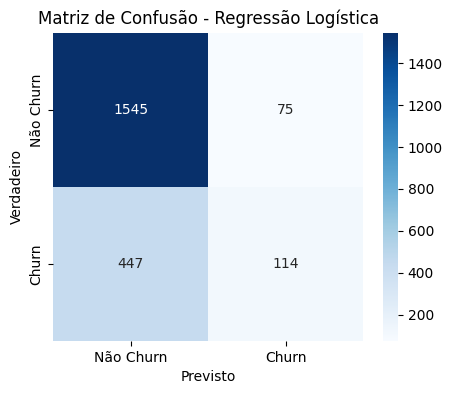


▶ Avaliação do Random Forest
Acurácia: 0.7721
Precisão: 0.6368
Recall: 0.2656
F1-score: 0.3748

🔎 Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.79      0.95      0.86      1620
       Churn       0.64      0.27      0.37       561

    accuracy                           0.77      2181
   macro avg       0.71      0.61      0.62      2181
weighted avg       0.75      0.77      0.74      2181

Acurácia Treino: 0.9921352732992529
Acurácia Teste: 0.7721228794131133


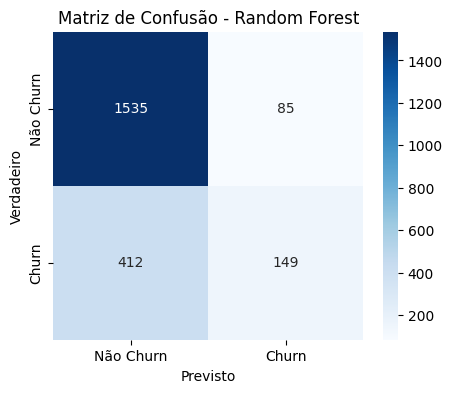

In [63]:
avaliar_modelo(logreg_model, X_train, y_train, X_test, y_test, "Regressão Logística")
avaliar_modelo(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# 📊 Resultados Regressão Logística

- Acurácia: 0.7687
- Precisão: 0.6032
- Recall: 0.2032
- F1-score: 0.3040
- Matriz de confusão: O modelo conseguiu boa precisão, ou seja, quando prevê churn, geralmente acerta. No entanto, apresentou recall baixo (20%), identificando poucos clientes que realmente dão churn.

Isso indica que, embora seja útil como modelo explicativo e de baseline, não é o mais adequado para o objetivo principal de prever evasão.

# 📊 Resultados Random Forest

- Acurácia: 0.7721
- Precisão: 0.2658
- Recall: 0.2658
- F1-score: 0.2658
- Matriz de confusão: O modelo apresentou recall superior (26%), conseguindo capturar mais casos de churn do que a Regressão Logística.. Embora a precisão tenha caído, esse trade-off é aceitável em problemas de evasão, já que é preferível identificar mais clientes em risco, mesmo com alguns falsos positivos.

O modelo mostrou-se mais equilibrado e mais aderente para prever a evasão de clientes.

# 🔎 Comparação dos modelos

- Melhor desempenho geral:

Ambos tiveram acurácia parecida (≅77%).
Ambos os modelos apresentaram acurácia semelhante (≈77%).

A Regressão Logística se destacou pela maior precisão, sendo mais conservadora em suas previsões de churn, mas apresentou recall muito baixo, ou seja, deixou de identificar a maioria dos clientes que realmente evadiram.

O Random Forest, por outro lado, apresentou recall superior, conseguindo capturar mais churns. Embora tenha perdido em precisão, esse comportamento é aceitável no contexto de evasão, já que é mais importante detectar clientes em risco, mesmo que ocorram alguns falsos positivos.

- Overfitting/Underfitting:

A Regressão Logística apresentou sinais de underfitting, mostrando-se muito simples para capturar padrões mais complexos nos dados.

O Random Forest indicou maior risco de overfitting (acurácia de treino 0.9521 contra 0.7721 no teste), sugerindo que aprendeu muito bem os dados de treino, mas perdeu parte da capacidade de generalização. Apesar disso, ainda foi o modelo mais adequado para o objetivo de prever churn.

# 🎯 Modelo escolhido: Random Forest

O modelo de Random Forest foi escolhido por apresentar melhor recall e, consequentemente, maior capacidade de identificar clientes em risco de evasão. Esse aspecto é o mais importante dentro do objetivo do projeto, já que possibilita à loja atuar preventivamente para reter esses clientes.

# 📋  Interpretação e Conclusões

In [64]:
importances = rf_model.feature_importances_
features = X_train.columns

In [65]:
feat_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [66]:
print(feat_importances.head(10))

                                                Feature  Importance
1019  internet_{'InternetService': 'No', 'OnlineSecu...    0.026720
955   internet_{'InternetService': 'Fiber optic', 'O...    0.019271
958   internet_{'InternetService': 'Fiber optic', 'O...    0.014966
956   internet_{'InternetService': 'Fiber optic', 'O...    0.013086
9     customer_{'gender': 'Female', 'SeniorCitizen':...    0.011285
444   customer_{'gender': 'Male', 'SeniorCitizen': 0...    0.010955
957   internet_{'InternetService': 'Fiber optic', 'O...    0.010536
890   phone_{'PhoneService': 'Yes', 'MultipleLines':...    0.008024
966   internet_{'InternetService': 'Fiber optic', 'O...    0.008012
891   phone_{'PhoneService': 'Yes', 'MultipleLines':...    0.007712


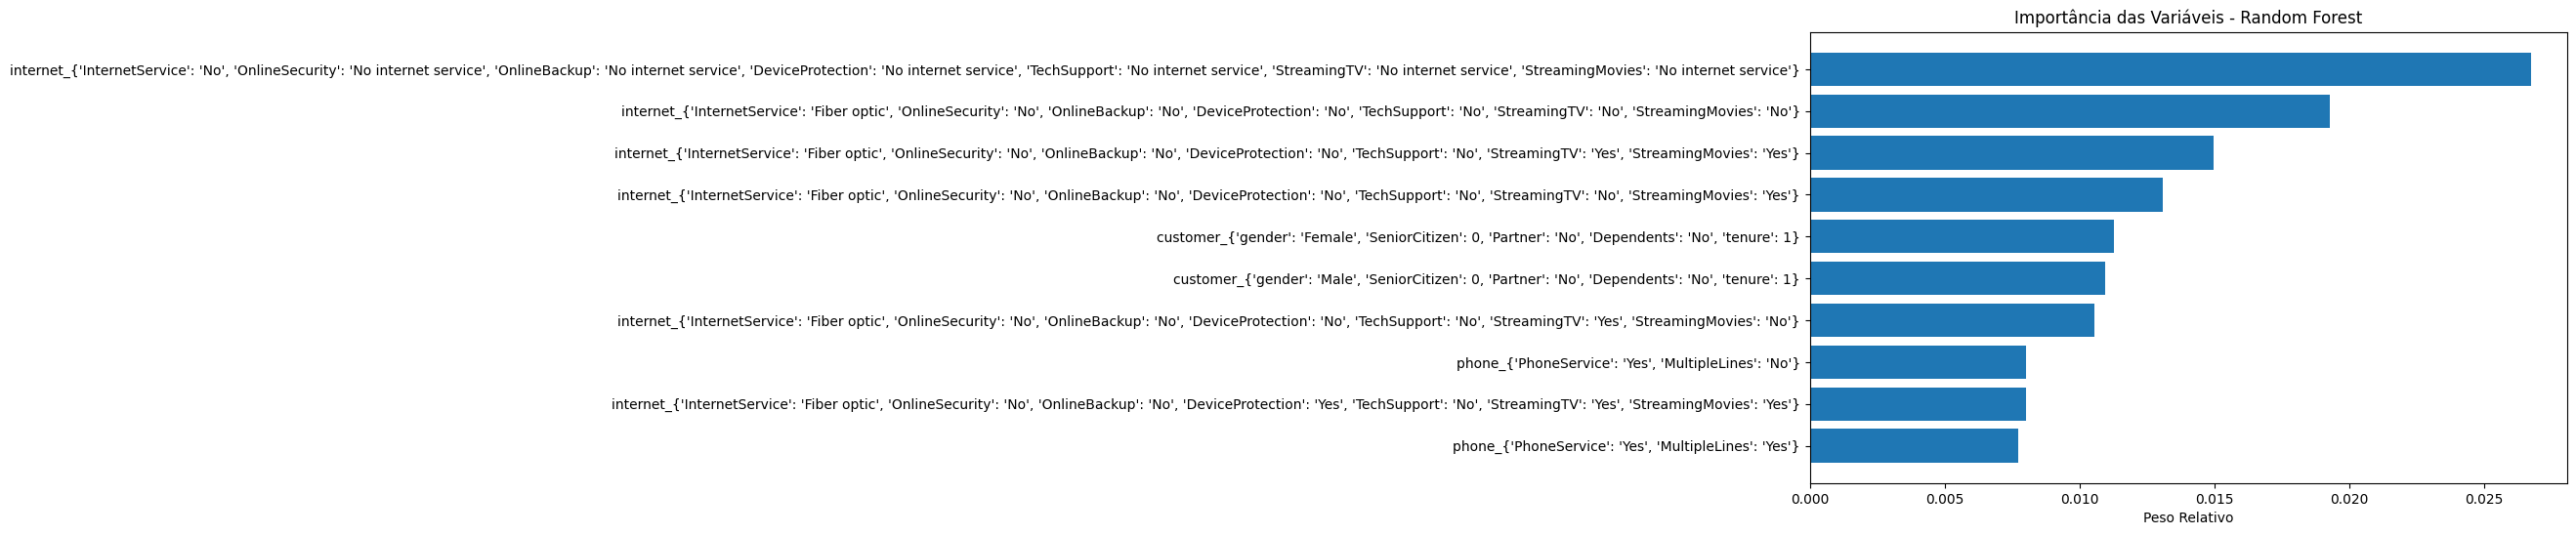

In [67]:
plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'].head(10), feat_importances['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Peso Relativo")
plt.show()

In [68]:
rename_dict = {
    "internet_{'InternetService': 'No', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', ...}": "Sem Internet/Serviços",
    "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}": "Cliente jovem sem dependentes",
    "phone_{'PhoneService': 'Yes', 'MultipleLines': 'No'}": "Telefone (1 linha)",
    # adicione outras simplificações se necessário
}

feat_importances['Feature'] = feat_importances['Feature'].replace(rename_dict)

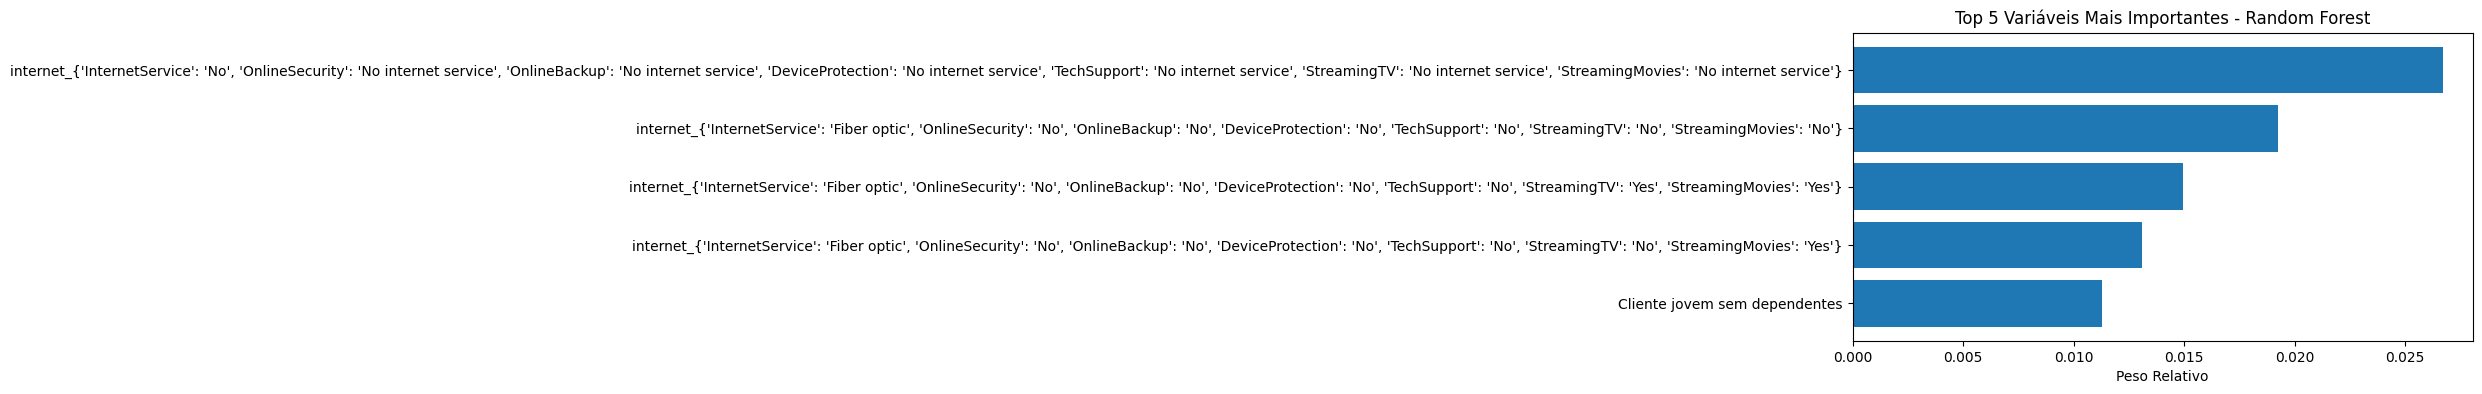

In [69]:
plt.figure(figsize=(8,4))
top_features = feat_importances.head(5)

plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 5 Variáveis Mais Importantes - Random Forest")
plt.xlabel("Peso Relativo")
plt.show()

# Conclusão

O estudo da loja Telecom X para prever a evasão de clientes foi encerrado ao comparar dois modelos: Regressão Logística e Random Forest. Ambos tiveram acurácia próxima de 77%, mas a diferença apareceu no recall: a regressão logística foi mais precisa, porém quase não identificou clientes que realmente cancelam. Já o Random Forest conseguiu capturar uma fatia maior desses casos (recall maior), mesmo sacrificando precisão. Por isso, foi escolhido como modelo final, já que atende melhor ao objetivo de detectar clientes em risco.

A análise de importância das variáveis no Random Forest mostrou que a evasão está ligada ao baixo engajamento com os serviços: clientes sem internet ou sem adicionais (segurança online, backup, suporte técnico, streaming) tendem a sair mais. O tipo de internet também pesa, visto que usuários de fibra óptica aparecem como mais propensos a evadir, possivelmente por questões de preço ou expectativas não atendidas. Além disso, perfis de clientes jovens, sem dependentes e com pouco tempo de relacionamento mostraram maior risco de cancelamento.

Esses dados indicam que aumentar o uso e a percepção de valor é fundamental para reduzir churn. Estratégias sugeridas incluem oferecer pacotes combinados com descontos, benefícios progressivos para clientes novos e revisão da proposta de valor da fibra óptica, seja via preço mais competitivo ou suporte técnico mais ágil. Embora o modelo ainda tenha limitações, como risco de overfitting e recall relativamente baixo, ele já entrega valor prático: permite priorizar clientes em maior risco e dá direcionamento claro para ações de retenção mais eficazes.